# Report on CODS analysis with our synthetic datasets

CODS is a data-driven iterative algorithm for modelling the generated power signal in a PV plant. In particular, it can be used for estimating the degradation rate and soiling profile.
The algorithm takes as input the normalized power signal, and performs the 4 following steps:
1. identification of cleaning events by means of a 9-day rolling median,
2. estimate soiling profile using a Kalman filter,
3. estimate seasonal component by mean of LOESS (STL) decomposition, and
4. estimate degradation rate using year-on-year method.

These four steps are repeated until convergence has been reached. Convergence is measured by the root mean squared error (RMSE) of the daily values of the model versus the observed normalized power or performance index (PI). The convergence criterion is that the relative change in the RMSE from one iteration to the next is smaller than 0.1 %.

**Methodology**

- We have applied CODS algorithm to the 4 different types of synthetic time series, namely *basic*, *soil*, *weather* and *soil+weather*. Each of these types contains 50 time series.
- The input signal is the normalized power. The normalization is as follows ... <font color=red> Clemens, could you fill this? </font> 


**Conclusions**

- RMSE for the degradation rate (for basic clipping and w/o threshold removal):
    - Basic : 0.353 %/year 
    - Soil :  0.187 %/year 
    - Weather : 0.333 %/year
    - Soil + Weather: 0.475 %/yr
- The estimated number of cleaning events is larger than the true number of cleaning events

In [8]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from src.models.cods_analysis import cods_process_results_all, plot_pi, plot_rd, plot_sr
import rdtools
import pickle
import time
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import mean_squared_error
import numpy as np
#from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
label_size = 16
mpl.rcParams["xtick.labelsize"] = label_size 
mpl.rcParams["ytick.labelsize"] = label_size
from warnings import filterwarnings
filterwarnings('ignore')

## Basic w/ basic clipping and w/o outlier removal (threshold=0.00)

In [4]:
path_to_data = '../data/raw/synthetic_basic.zip'
path_to_pi   = '../data/raw/synthetic_basic_pi_daily.zip'
path_to_cods = '../data/processed/cods_results_basic_r512_c1_o000.zip'
pi, rd, sr   = cods_process_results_all(path_to_data, path_to_pi, path_to_cods, realizations=512, 
                                        clipping="1", verbose=False)

**Performance index**

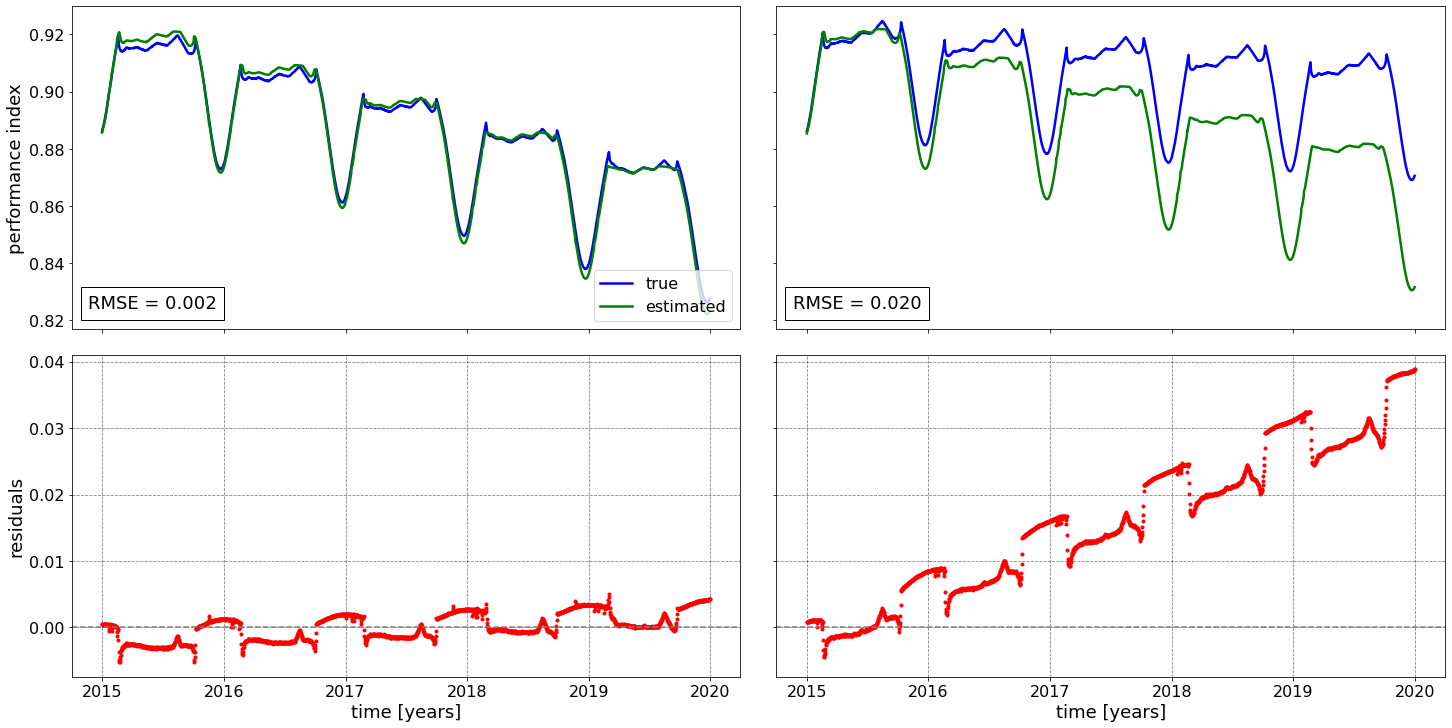

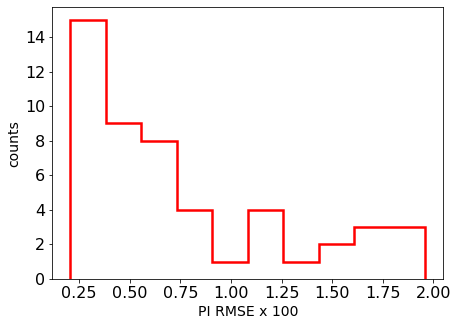

In [5]:
plot_pi(pi)

**Degradation rate**

the RMSE for the degradation rate is 0.353 percentage/year


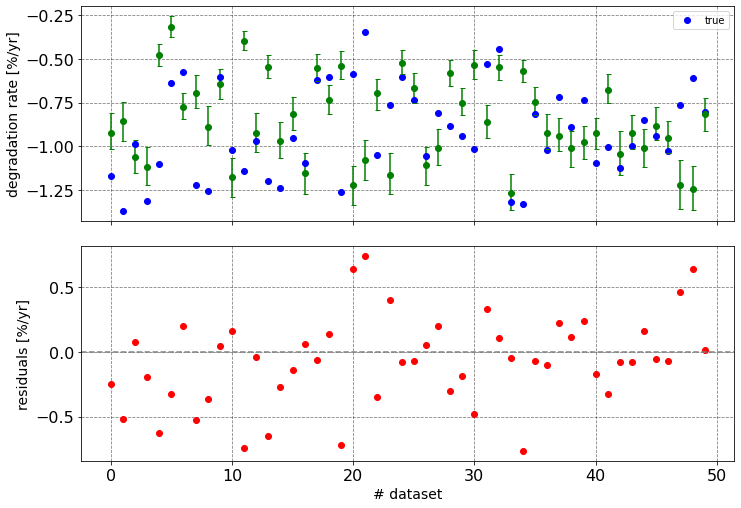

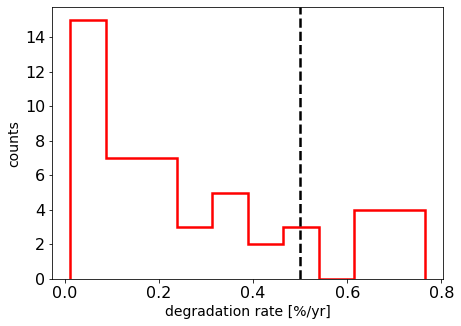

In [6]:
plot_rd(rd)

rmse_rd = mean_squared_error(rd[1], rd[2][:, 0], squared=False)
print ("the RMSE for the degradation rate is %.3f percentage/year" %rmse_rd)

**Soiling profile**

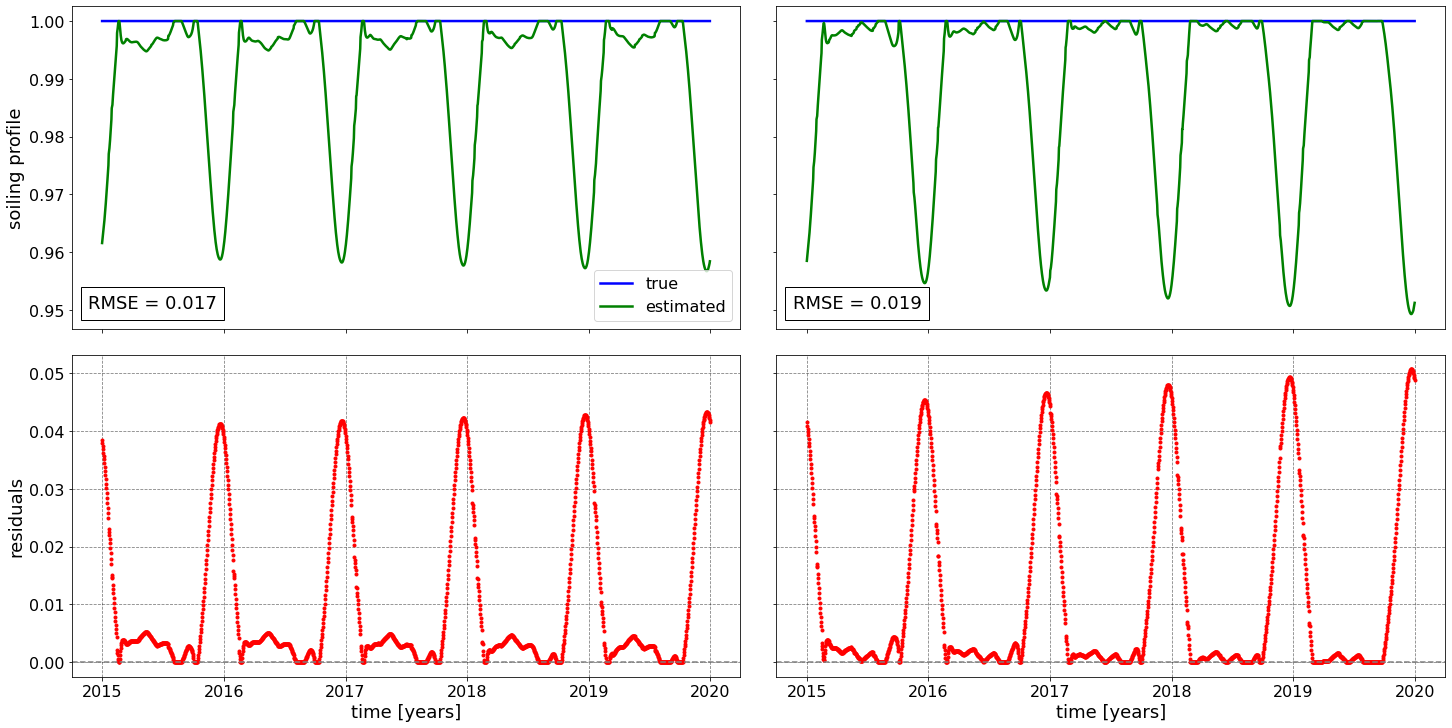

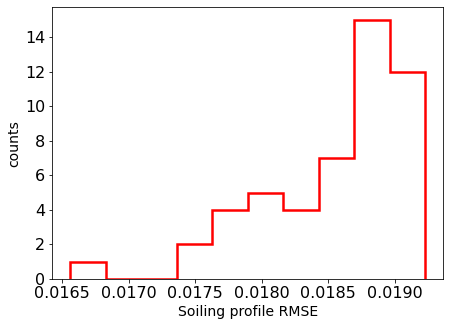

In [10]:
plot_sr(sr)

## Soil w/ basic clipping and w/o outlier removal (threshold=0.00)

In [22]:
path_to_data = '../data/raw/synthetic_soil.zip'
path_to_pi   = '../data/raw/synthetic_soil_pi_daily.zip'
path_to_cods = '../data/processed/cods_results_soil_r512_c1_o000.zip'
pi, rd, sr   = cods_process_results_all(path_to_data, path_to_pi, path_to_cods, realizations=512, 
                                        clipping="1", verbose=False)

**Performance index**

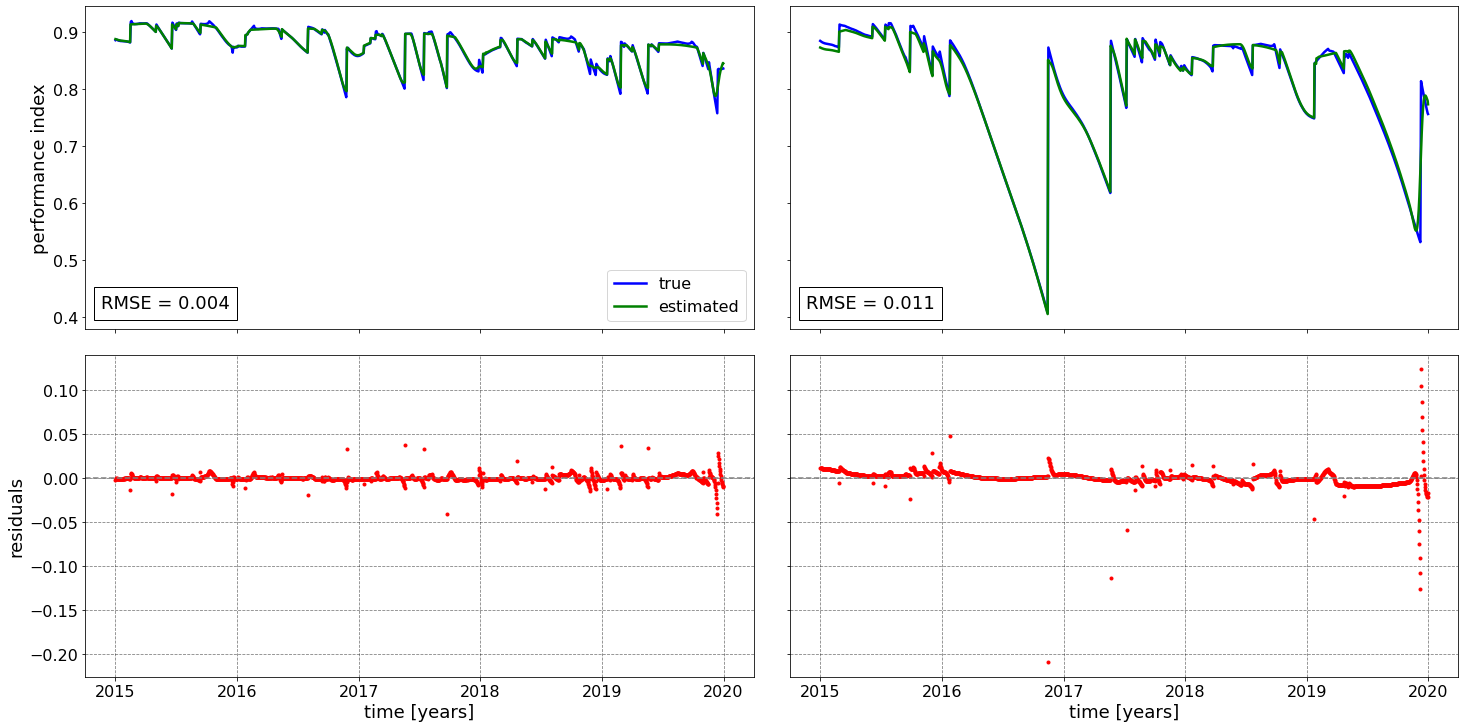

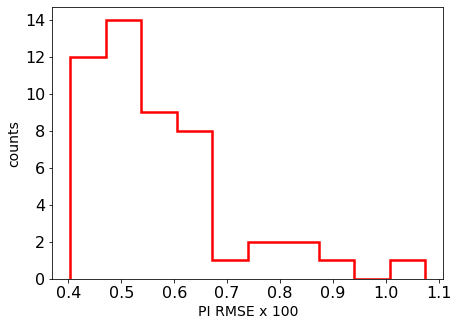

In [23]:
plot_pi(pi)

**Degradation rate**

the RMSE for the degradation rate is 0.187 percentage/year


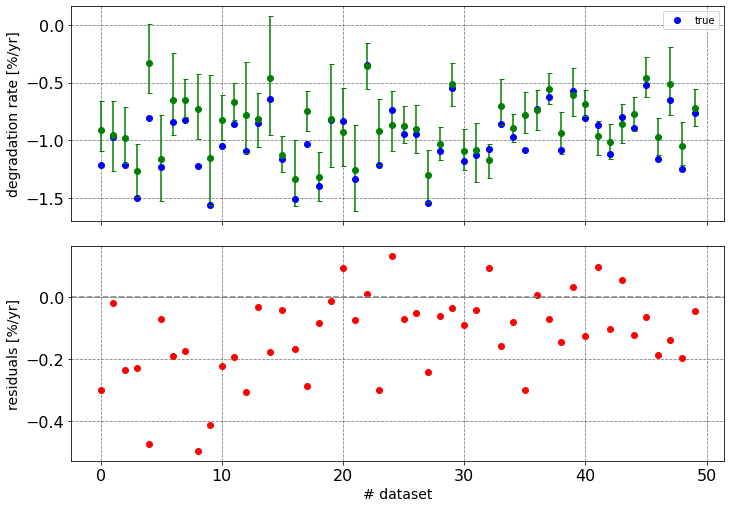

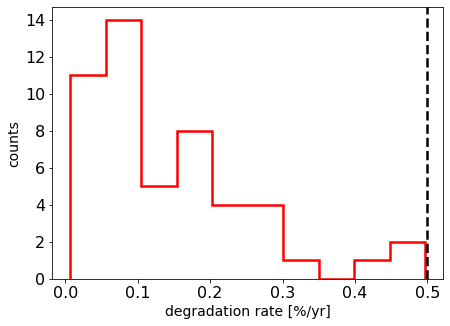

In [24]:
plot_rd(rd)

rmse_rd = mean_squared_error(rd[1], rd[2][:, 0], squared=False)
print ("the RMSE for the degradation rate is %.3f percentage/year" %rmse_rd)

**Soiling profile**

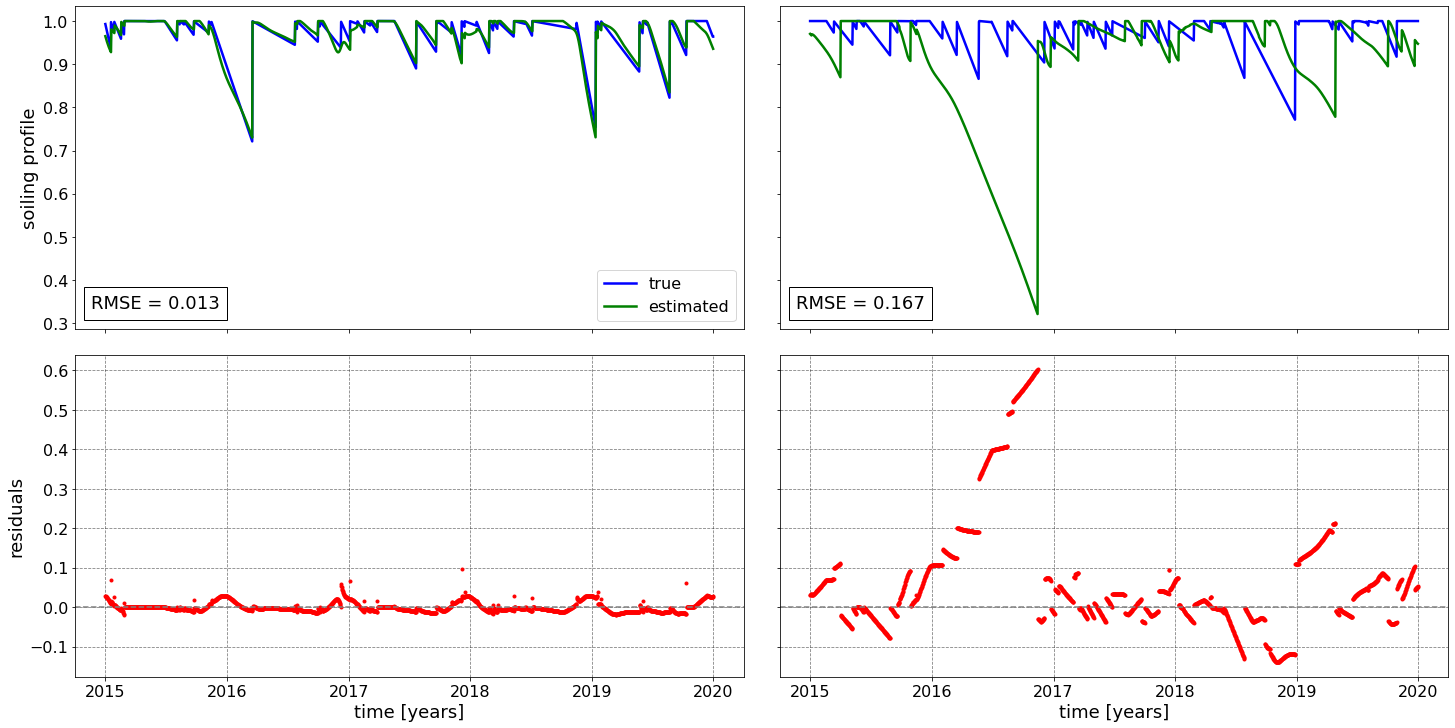

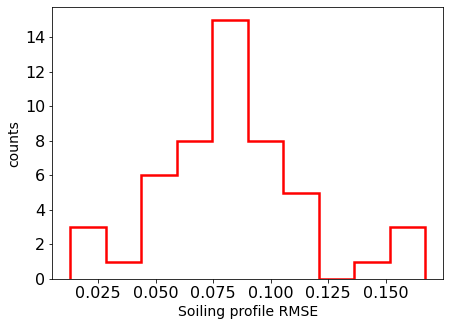

In [14]:
plot_sr(sr)

## Weather w/ basic clipping and w/o outlier removal (threshold=0.00)

In [19]:
path_to_data = '../data/raw/synthetic_weather.zip'
path_to_pi   = '../data/raw/synthetic_weather_pi_daily.zip'
path_to_cods = '../data/processed/cods_results_weather_r512_c1_o000.zip'
pi, rd, sr   = cods_process_results_all(path_to_data, path_to_pi, path_to_cods, realizations=512, 
                                        clipping="1", verbose=False)

**Performance index**

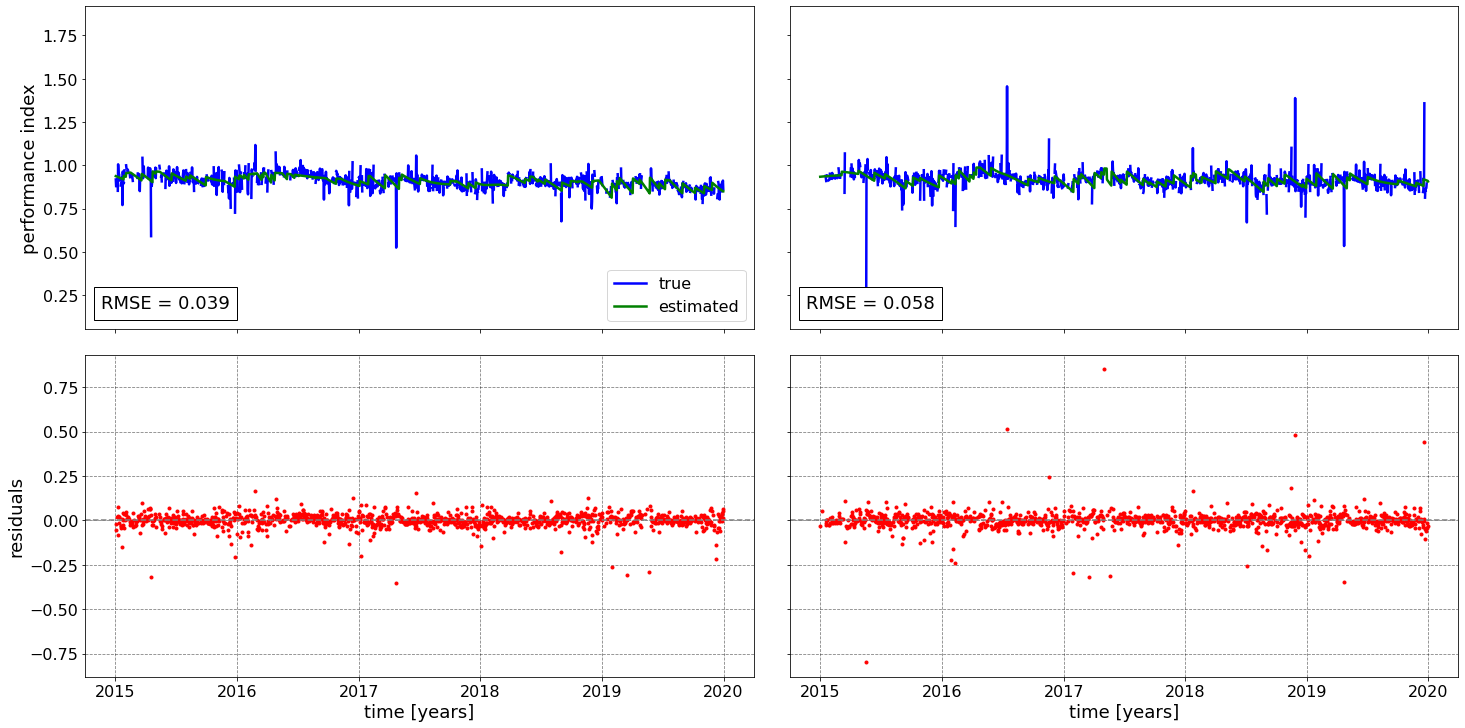

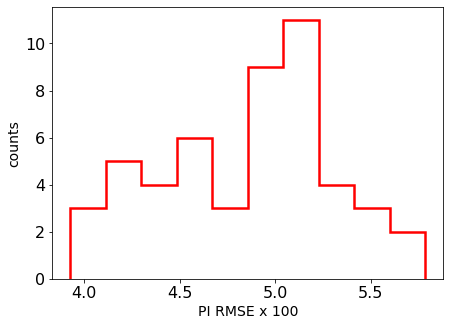

In [20]:
plot_pi(pi)

**Degradation rate**

the RMSE for the degradation rate is 0.333 percentage/year


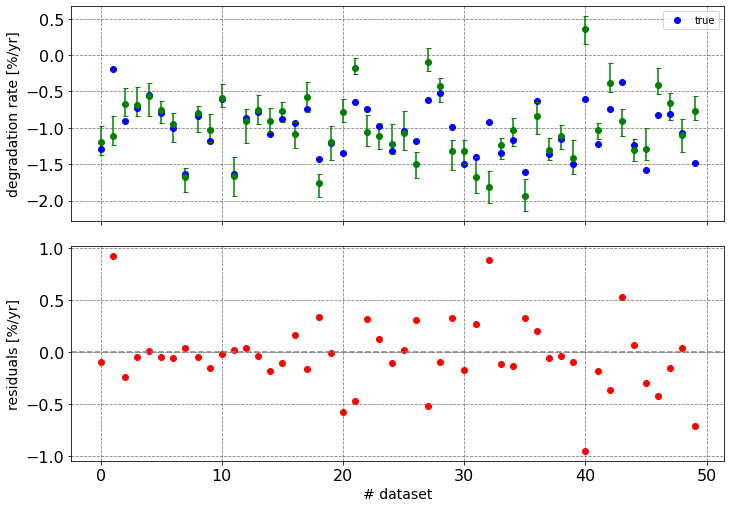

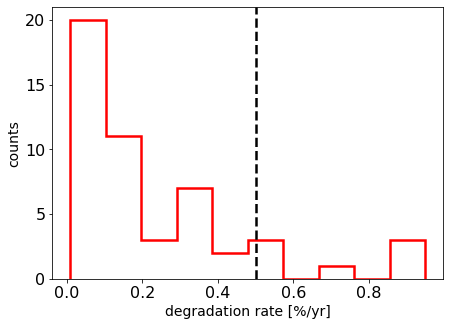

In [21]:
plot_rd(rd)

rmse_rd = mean_squared_error(rd[1], rd[2][:, 0], squared=False)
print ("the RMSE for the degradation rate is %.3f percentage/year" %rmse_rd)

**Soiling profile**

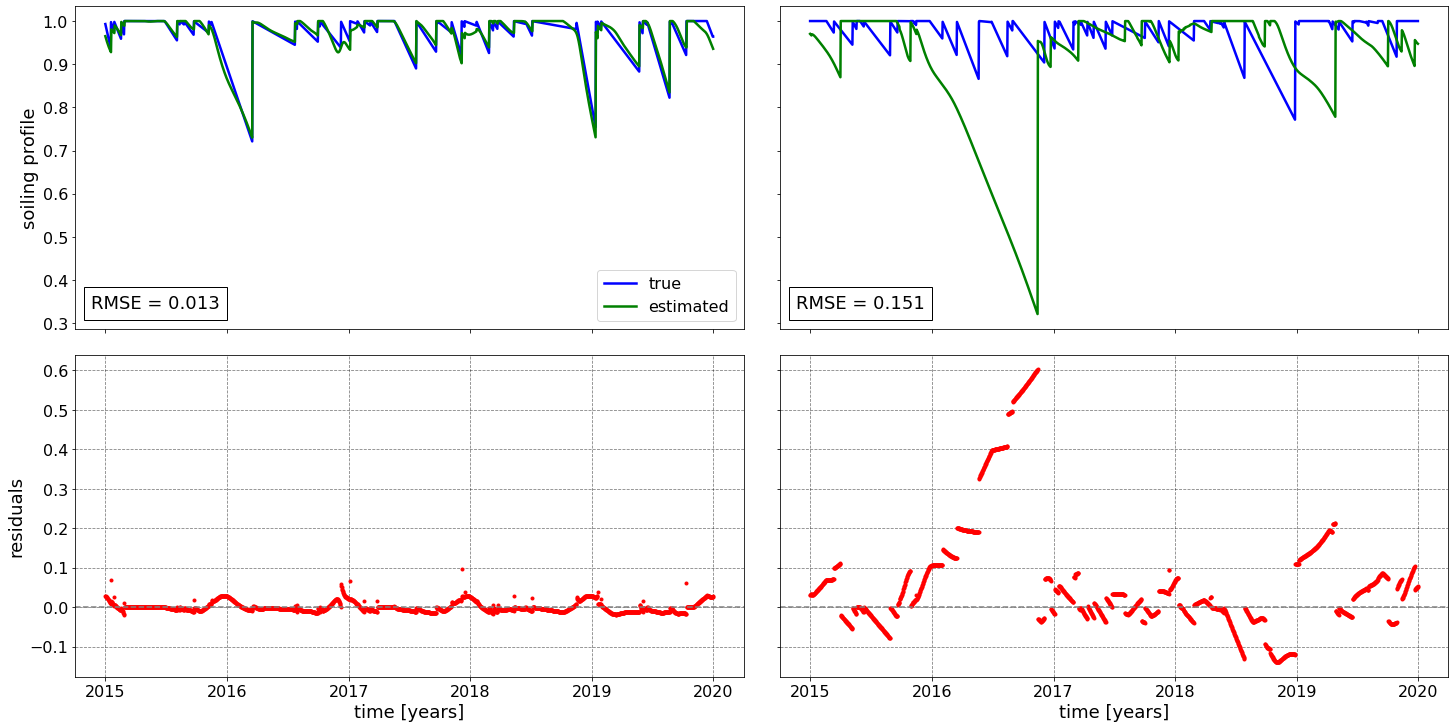

In [25]:
plot_sr(sr)

## Soil+Weather w/ basic clipping and w/o outlier removal (threshold=0.00)

In [25]:
path_to_data = '../data/raw/synthetic_soil_weather.zip'
path_to_pi   = '../data/raw/synthetic_soil_weather_pi_daily.zip'
path_to_cods = '../data/processed/cods_results_soil_weather_r512_c1_o000.zip'
pi, rd, sr   = cods_process_results_all(path_to_data, path_to_pi, path_to_cods, realizations=512, 
                                        clipping="1", verbose=False)

**Performance index**

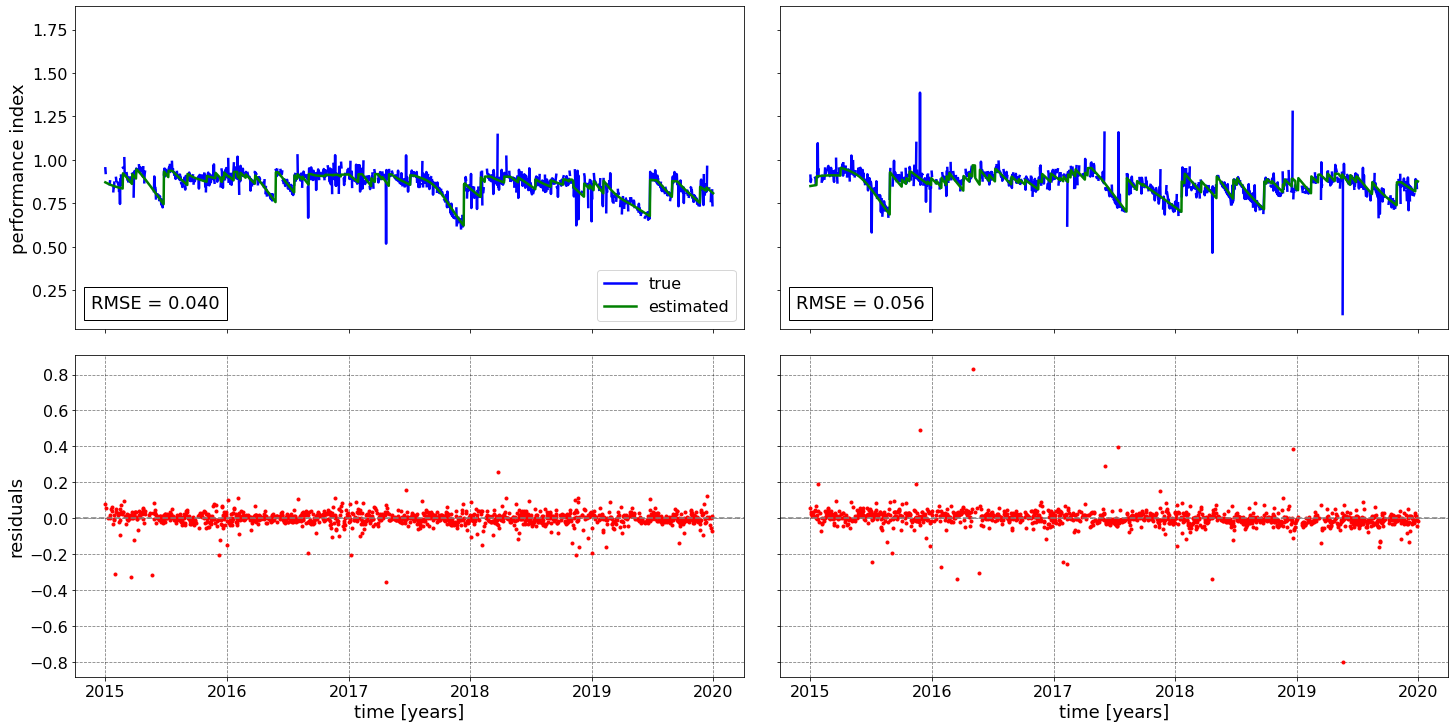

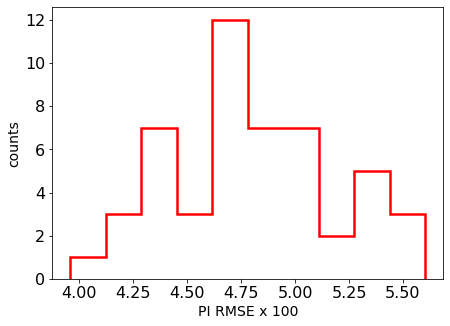

In [26]:
plot_pi(pi)

**Degradation rate**

the RMSE for the degradation rate is 0.475 percentage/year


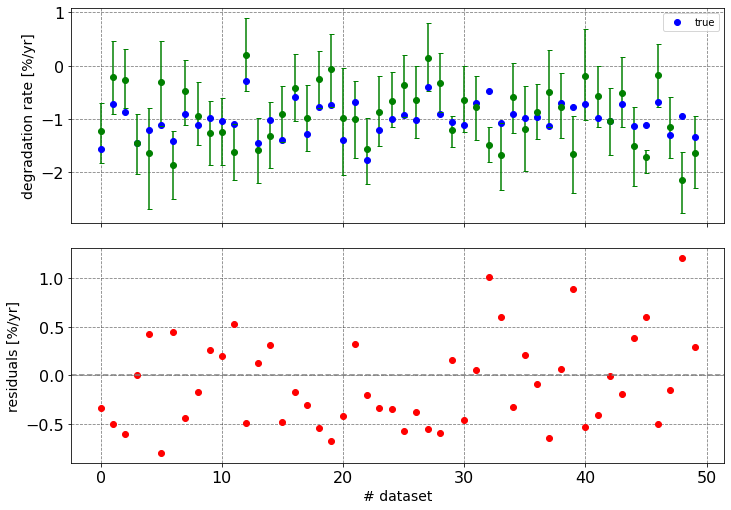

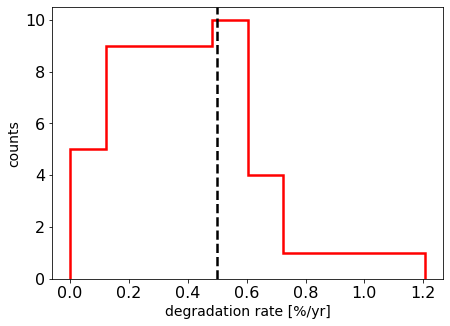

In [27]:
plot_rd(rd)

rmse_rd = mean_squared_error(rd[1], rd[2][:, 0], squared=False)
print ("the RMSE for the degradation rate is %.3f percentage/year" %rmse_rd)

**Soiling profile**

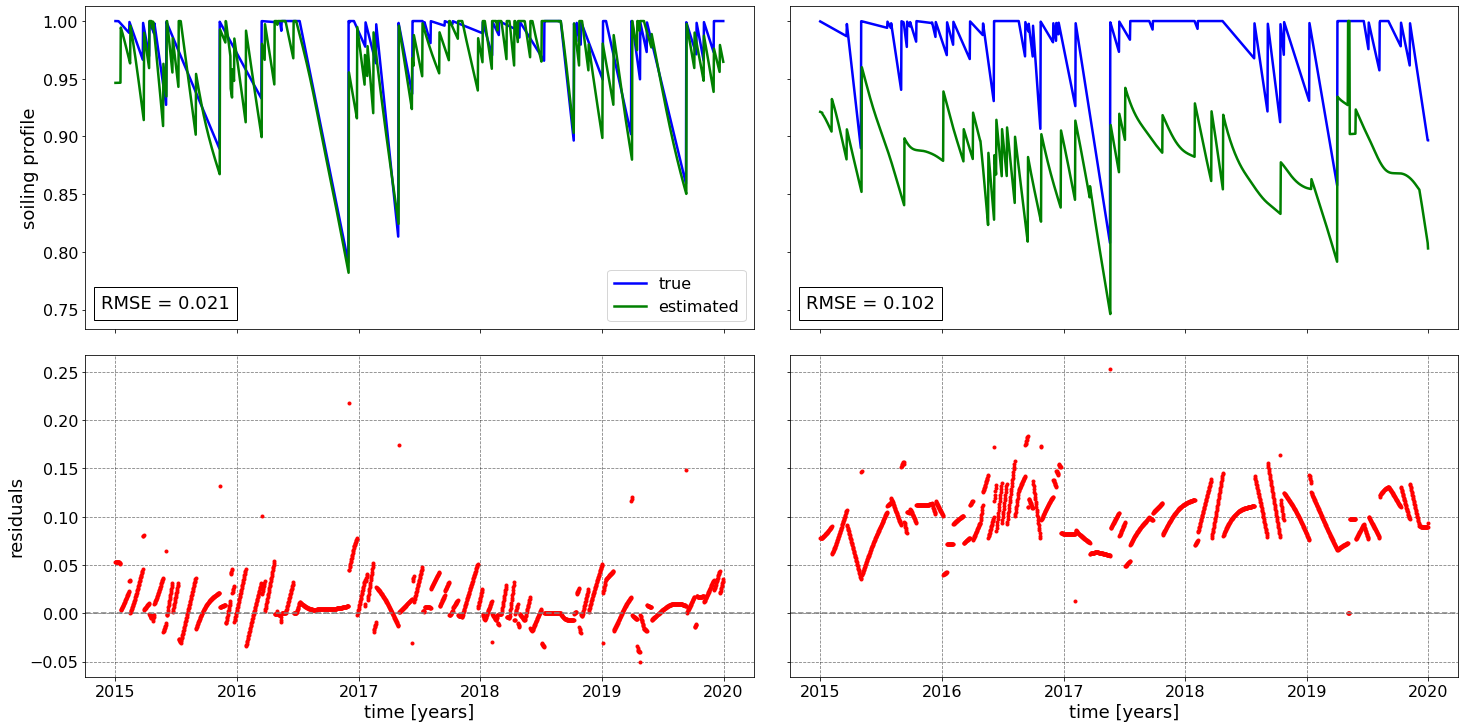

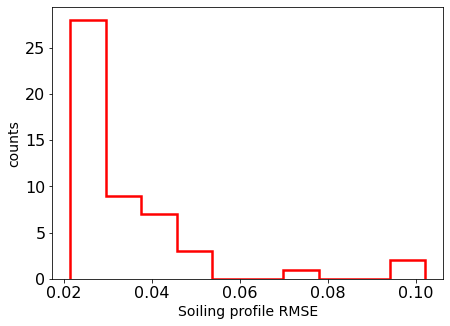

In [28]:
plot_sr(sr)